In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,0
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,1
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,2
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,3
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,4
5,e,x,y,y,t,a,f,c,b,n,...,w,w,p,w,o,p,k,n,g,5
6,e,b,s,w,t,a,f,c,b,g,...,w,w,p,w,o,p,k,n,m,6
7,e,b,y,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,s,m,7
8,p,x,y,w,t,p,f,c,n,p,...,w,w,p,w,o,p,k,v,g,8
9,e,b,s,y,t,a,f,c,b,g,...,w,w,p,w,o,p,k,s,m,9


In [4]:
labelEncoder = preprocessing.LabelEncoder()
for col in data.columns:
    data[col] = labelEncoder.fit_transform(data[col])

# Splitting test train set, with 20% of the data as the validation set
train, test = train_test_split(data, test_size = 0.2) 

In [26]:
train.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
4746,1,2,2,4,0,2,1,0,1,0,...,6,6,0,2,1,0,7,4,0,4746
3258,1,2,3,3,0,2,1,0,0,3,...,4,0,0,2,1,2,1,5,1,3258
4998,0,5,2,4,0,5,0,0,0,5,...,5,5,0,1,1,4,3,4,2,4998
5,0,5,3,9,1,0,1,0,0,5,...,7,7,0,2,1,4,2,2,1,5
1465,0,2,0,3,0,5,1,1,0,5,...,7,7,0,2,1,0,2,3,1,1465
3475,1,5,0,3,0,2,1,0,0,2,...,0,6,0,2,1,2,1,4,4,3475
4231,1,2,2,2,0,8,1,0,1,0,...,7,6,0,2,1,0,7,4,2,4231
2575,0,2,3,3,1,5,1,0,0,7,...,3,3,0,2,1,4,2,5,0,2575
3871,1,2,3,8,1,5,1,0,0,10,...,7,7,0,2,2,4,5,4,3,3871
3461,1,5,3,9,0,2,1,0,0,7,...,4,6,0,2,1,2,1,5,4,3461


In [5]:
# Train set
train_y = train['class']
train_x = train[[x for x in train.columns if 'class' not in x]]
# Test/Validation set
test_y = test['class']
test_x = test[[x for x in test.columns if 'class' not in x]]

models = [SVC(kernel='rbf', random_state=0), SVC(kernel='linear', random_state=0), XGBClassifier(), LogisticRegression()]
model_names = ['SVC_rbf', 'SVC_linear', 'xgboost', 'Logistic Regression']
for i, model in enumerate(models):
    model.fit(train_x, train_y)
    print ('The accurancy of ' + model_names[i] + ' is ' + str(accuracy_score(test_y, model.predict(test_x))) )

The accurancy of SVC_rbf is 0.9090106007067138
The accurancy of SVC_linear is 0.9602473498233216
The accurancy of xgboost is 1.0
The accurancy of Logistic Regression is 0.9593639575971732


C:\Users\John\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


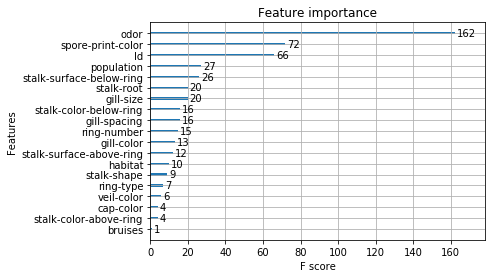

In [6]:
ax = xgboost.plot_importance(models[2])

In [69]:
best_model = models[2]
test_noncoded = pd.read_csv("test.csv")
test_data = pd.read_csv("test.csv")
labelEncoder = preprocessing.LabelEncoder()
for col in test_data.columns:
    test_data[col] = labelEncoder.fit_transform(data[col])
test_noncoded.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
0,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,s,m,11
1,b,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,s,m,20
2,b,y,w,t,a,f,c,b,w,e,...,w,w,p,w,o,p,n,n,m,23
3,f,s,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,n,v,g,25
4,f,f,n,f,n,f,c,n,k,e,...,w,w,p,w,o,p,k,y,u,28
5,x,s,y,t,a,f,w,n,n,t,...,w,w,p,w,o,p,n,v,d,29
6,b,s,y,t,l,f,c,b,g,e,...,w,w,p,w,o,p,n,n,m,30
7,s,f,g,f,n,f,c,n,k,e,...,w,w,p,w,o,p,k,v,u,36
8,x,y,y,t,l,f,c,b,n,e,...,w,w,p,w,o,p,k,y,p,41
9,x,y,n,t,a,f,c,b,w,e,...,w,w,p,w,o,p,k,s,g,50


In [21]:
import pprint
predictions = list(best_model.predict(test_data))
print(list(predictions)[:100])

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]


C:\Users\John\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [71]:
# col_to_classification = {}
# for i,p in enumerate(predictions):
#     ['e' if p == 0 else 'p' for p in predictions]
#     col_to_classification[i] = label

classes = ['e' if p == 0 else 'p' for p in predictions]
test_noncoded['class'] = classes
submit = test_noncoded[['class','Id']]
submit.to_csv('submission.csv', index=False)
submit.head(10)

,class,Id
0,e,11
1,e,20
2,e,23
3,p,25
4,e,28
5,e,29
6,e,30
7,e,36
8,e,41
9,e,50


In [34]:
# print(col_to_classification)

In [41]:
d = {'class': classes, 'Id': list(range(len(classes)))}
df = pd.DataFrame(data=d)
df.to_csv('submission.csv', index=False)

In [40]:
print(df)

     class    Id
0        e     0
1        e     1
2        e     2
3        p     3
4        e     4
5        e     5
6        e     6
7        e     7
8        e     8
9        e     9
10       p    10
11       p    11
12       e    12
13       e    13
14       e    14
15       e    15
16       e    16
17       e    17
18       e    18
19       e    19
20       p    20
21       e    21
22       e    22
23       e    23
24       e    24
25       e    25
26       e    26
27       e    27
28       e    28
29       e    29
...    ...   ...
2437     e  2437
2438     p  2438
2439     p  2439
2440     e  2440
2441     e  2441
2442     p  2442
2443     e  2443
2444     p  2444
2445     p  2445
2446     e  2446
2447     e  2447
2448     p  2448
2449     p  2449
2450     p  2450
2451     p  2451
2452     p  2452
2453     e  2453
2454     p  2454
2455     p  2455
2456     e  2456
2457     p  2457
2458     e  2458
2459     e  2459
2460     e  2460
2461     e  2461
2462     e  2462
2463     e  24

In [61]:
verify_set = train
verify_set = verify_set.drop('class',1)
verify = best_model.predict(verify_set)
verify_set['class'] = verify
verify_set.head(10)

C:\Users\John\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id,class
4746,2,2,4,0,2,1,0,1,0,1,...,6,0,2,1,0,7,4,0,4746,1
3258,2,3,3,0,2,1,0,0,3,0,...,0,0,2,1,2,1,5,1,3258,1
4998,5,2,4,0,5,0,0,0,5,0,...,5,0,1,1,4,3,4,2,4998,0
5,5,3,9,1,0,1,0,0,5,0,...,7,0,2,1,4,2,2,1,5,0
1465,2,0,3,0,5,1,1,0,5,1,...,7,0,2,1,0,2,3,1,1465,0
3475,5,0,3,0,2,1,0,0,2,0,...,6,0,2,1,2,1,4,4,3475,1
4231,2,2,2,0,8,1,0,1,0,1,...,6,0,2,1,0,7,4,2,4231,1
2575,2,3,3,1,5,1,0,0,7,1,...,3,0,2,1,4,2,5,0,2575,0
3871,2,3,8,1,5,1,0,0,10,0,...,7,0,2,2,4,5,4,3,3871,1
3461,5,3,9,0,2,1,0,0,7,0,...,6,0,2,1,2,1,5,4,3461,1


In [55]:
print(verify[:10])
classes = ['e' if p == 0 else 'p' for p in verify]
print(classes[:10])

[1 1 0 0 0 1 1 0 1 1]
['p', 'p', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'p']


In [56]:
data = pd.read_csv("train.csv")
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,0
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,1
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,2
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,3
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,4
5,e,x,y,y,t,a,f,c,b,n,...,w,w,p,w,o,p,k,n,g,5
6,e,b,s,w,t,a,f,c,b,g,...,w,w,p,w,o,p,k,n,m,6
7,e,b,y,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,s,m,7
8,p,x,y,w,t,p,f,c,n,p,...,w,w,p,w,o,p,k,v,g,8
9,e,b,s,y,t,a,f,c,b,g,...,w,w,p,w,o,p,k,s,m,9
